In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import sys

sys.path.append('../')

from dependencies import utils

In [2]:
tracks = utils.load('../data/fma_metadata/tracks.csv')
feats = utils.load('../data/fma_metadata/features.csv')

In [3]:
small = tracks['set', 'subset'] <= 'small'

X = feats.loc[small]
y = tracks['track', 'genre_top'].loc[small]

#uncomment for 5-class or 2-class
y = y.loc[(y == 'Rock') | (y == 'Electronic') | (y == 'Instrumental') | (y == 'Hip-Hop') | (y == 'Pop')]
#y = y.loc[(y == 'Rock') | (y == 'Electronic')]
print(y.value_counts())

X = X.loc[X.index.isin(y.index)]

#uncomment for mfcc
#col = X.columns.get_loc('mfcc')
#X = X.iloc[:, col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Electronic             1000
Hip-Hop                1000
Instrumental           1000
Pop                    1000
Rock                   1000
Blues                     0
Classical                 0
Country                   0
Easy Listening            0
Experimental              0
Folk                      0
International             0
Jazz                      0
Old-Time / Historic       0
Soul-RnB                  0
Spoken                    0
Name: (track, genre_top), dtype: int64


In [4]:
sc = StandardScaler()
X_train2 = X_train.copy()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'relu', learning_rate_init = 0.1, batch_size = 300, hidden_layer_sizes = (200,100), max_iter = 100)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector

In [8]:
sfs = SequentialFeatureSelector(mlp, n_features_to_select=100, n_jobs=-1)

In [9]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=MLPClassifier(batch_size=300,
                                                  hidden_layer_sizes=(200, 100),
                                                  learning_rate_init=0.1,
                                                  max_iter=100, random_state=42,
                                                  solver='sgd'),
                          n_features_to_select=100, n_jobs=-1)

In [10]:
sfs.get_support()

array([False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [16]:
print(X_train.shape)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
print(X_train_sfs.shape)
print(X_test_sfs.shape)

(4000, 518)
(4000, 100)
(1000, 100)


In [17]:
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'relu', learning_rate_init = 0.1, batch_size = 300, hidden_layer_sizes = (200,100), max_iter = 100)
mlp.fit(X_train_sfs, y_train)
y_pred = mlp.predict(X_test_sfs)

In [307]:
print(mlp.classes_)

['Electronic' 'Hip-Hop' 'Instrumental' 'Pop' 'Rock']


Accuracy: 0.655

Classification Report:
              precision    recall  f1-score   support

  Electronic       0.69      0.59      0.64       202
     Hip-Hop       0.64      0.67      0.66       203
Instrumental       0.75      0.76      0.75       208
         Pop       0.52      0.55      0.54       187
        Rock       0.68      0.69      0.68       200

    accuracy                           0.66      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.66      0.66      0.66      1000



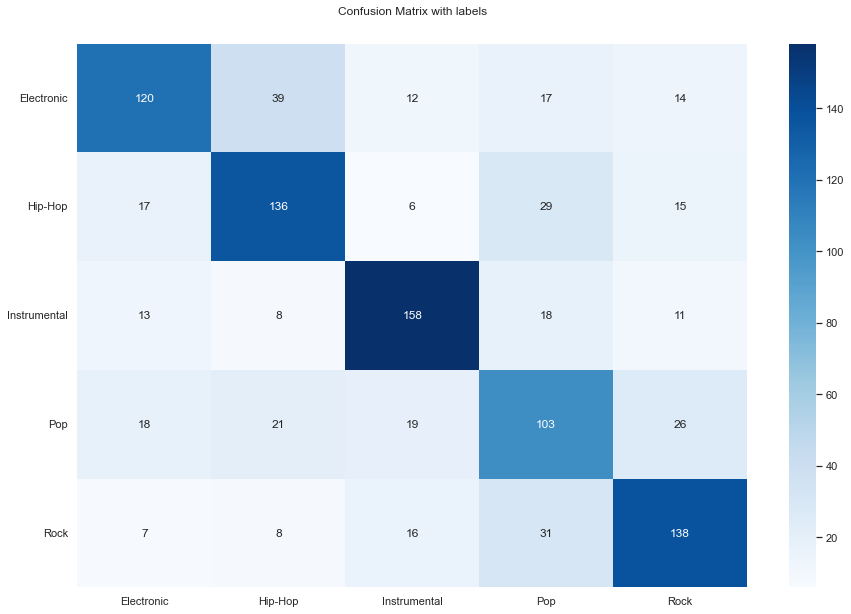

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(mlp.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(mlp.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

In [267]:
from sklearn.model_selection import GridSearchCV

learning_rate_init = [0.1, 0.2, 0.3]
max_iter = [100, 300]
hidden_layer_sizes = [(200,100), (200,50), (100,50)]
solver = ['sgd']
random_state = [42]
activation = ['logistic', 'relu']
batch_size = [100, 300]


# Make a dictionary of the grid search parameters
param_grid = dict(learning_rate_init=learning_rate_init, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes, solver=solver, random_state=random_state, activation=activation, batch_size=batch_size)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)

grid.fit(X_train, y_train)
print(grid.best_params_)

c:\Users\micha\anaconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\micha\anaconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\micha\anaconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\micha\anaconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\micha\anaconda3\envs\en

{'activation': 'logistic', 'batch_size': 100, 'hidden_layer_sizes': (200, 100), 'learning_rate_init': 0.1, 'max_iter': 100, 'random_state': 42, 'solver': 'sgd'}


Accuracy: 0.571875

Classification Report:
               precision    recall  f1-score   support

   Electronic       0.56      0.55      0.56       201
 Experimental       0.46      0.40      0.43       194
         Folk       0.61      0.67      0.64       209
      Hip-Hop       0.64      0.59      0.61       192
 Instrumental       0.57      0.57      0.57       198
International       0.63      0.72      0.67       212
          Pop       0.45      0.38      0.41       201
         Rock       0.60      0.67      0.64       193

     accuracy                           0.57      1600
    macro avg       0.57      0.57      0.57      1600
 weighted avg       0.57      0.57      0.57      1600



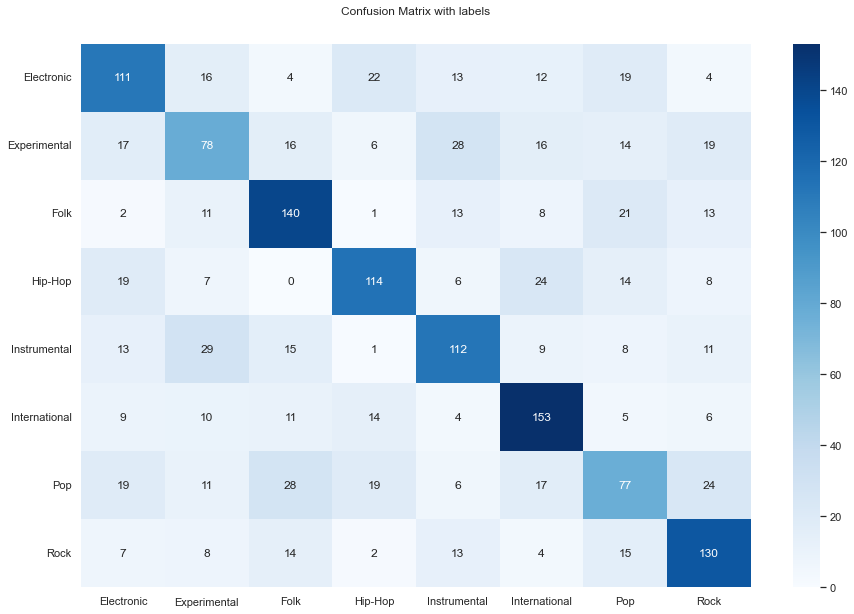

In [268]:
grid_pred = grid.predict(X_test)

print("Accuracy:", accuracy_score(y_test, grid_pred))
print("\nClassification Report:")
print(classification_report(y_test, grid_pred))
cf_mat = confusion_matrix(y_test, grid_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(mlp.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(mlp.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

In [195]:
import pickle

mlp_file = 'mlp_5_class_model.pkl'
pickle.dump(mlp, open(mlp_file, 'wb'))

sc = StandardScaler()
sc.fit(X_train2)
    
sc_file = 'mlp_5_class_sc.pkl'
pickle.dump(sc, open(sc_file, 'wb'))

In [309]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import pandas as pd
from scipy import stats
from pandas import DataFrame
import random

In [328]:
#filename = "../feature extraction/files/1.mp3"
#filename = "../feature extraction/files/2.mp3"
filename = "../feature extraction/files/3.mp3"
#filename = "../feature extraction/files/4.mp3"
#filename = "../feature extraction/files/5.mp3"
#filename = "../feature extraction/files/6.mp3"

print('File: {}'.format(filename))
x, sr = librosa.load(filename, sr=None, mono=True)

#print(x.shape[-1]/sr)
if (x.shape[-1]/sr > 30):
    start = random.randint(0, int(x.shape[-1]/sr)-30)
    duration = 30
else:
    start = 0
    duration = x.shape[-1]/sr
#print(start)

#x, sr = librosa.load(filename, sr=None, mono=True, offset=start, duration=duration)

print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

File: ../feature extraction/files/3.mp3


c:\Users\micha\anaconda3\envs\env1\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Duration: 240.91s, 10624000 samples


In [329]:
def columns():
    feature_sizes = dict(chroma_stft=12, chroma_cqt=12, chroma_cens=12,
                         tonnetz=6, mfcc=20, rmse=1, zcr=1,
                         spectral_centroid=1, spectral_bandwidth=1,
                         spectral_contrast=7, spectral_rolloff=1)
    moments = ('mean', 'std', 'skew', 'kurtosis', 'median', 'min', 'max')

    columns = []
    for name, size in feature_sizes.items():
        for moment in moments:
            it = ((name, moment, '{:02d}'.format(i+1)) for i in range(size))
            columns.extend(it)

    names = ('feature', 'statistics', 'number')
    columns = pd.MultiIndex.from_tuples(columns, names=names)

    return columns.sort_values()

In [330]:
features = pd.Series(index=columns(), dtype=np.float32)

def feature_stats(name, values):
        features[name, 'mean'] = np.mean(values, axis=1)
        features[name, 'std'] = np.std(values, axis=1)
        features[name, 'skew'] = stats.skew(values, axis=1)
        features[name, 'kurtosis'] = stats.kurtosis(values, axis=1)
        features[name, 'median'] = np.median(values, axis=1)
        features[name, 'min'] = np.min(values, axis=1)
        features[name, 'max'] = np.max(values, axis=1)

In [331]:
f = librosa.feature.zero_crossing_rate(x, frame_length=2048, hop_length=512)
feature_stats('zcr', f)

cqt = np.abs(librosa.cqt(x, sr=sr, hop_length=512, bins_per_octave=12,
                                 n_bins=7*12, tuning=None))
assert cqt.shape[0] == 7 * 12
assert np.ceil(len(x)/512) <= cqt.shape[1] <= np.ceil(len(x)/512)+1

f = librosa.feature.chroma_cqt(C=cqt, n_chroma=12, n_octaves=7)
feature_stats('chroma_cqt', f)
f = librosa.feature.chroma_cens(C=cqt, n_chroma=12, n_octaves=7)
feature_stats('chroma_cens', f)
f = librosa.feature.tonnetz(chroma=f)
feature_stats('tonnetz', f)

del cqt
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
assert stft.shape[0] == 1 + 2048 // 2
assert np.ceil(len(x)/512) <= stft.shape[1] <= np.ceil(len(x)/512)+1
del x

f = librosa.feature.chroma_stft(S=stft**2, n_chroma=12)
feature_stats('chroma_stft', f)

f = librosa.feature.rms(S=stft)
feature_stats('rmse', f)

f = librosa.feature.spectral_centroid(S=stft)
feature_stats('spectral_centroid', f)
f = librosa.feature.spectral_bandwidth(S=stft)
feature_stats('spectral_bandwidth', f)
f = librosa.feature.spectral_contrast(S=stft, n_bands=6)
feature_stats('spectral_contrast', f)
f = librosa.feature.spectral_rolloff(S=stft)
feature_stats('spectral_rolloff', f)

mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
del stft
f = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
feature_stats('mfcc', f)

In [332]:
features = features.to_frame().T
print(features.shape)

(1, 518)


In [333]:
sc.fit(X_train2)
features = sc.transform(features)
#print(features)
mlpprediction = mlp.predict(features)
print(mlpprediction)
bestprediction = grid.predict(features)
print(bestprediction)

['Electronic']
['Folk']
